In [1]:
import numpy as np

In [2]:
psin = np.load('in.npy')
psx = np.load('x.npy')
psy = np.load('y.npy')

In [9]:
def _get_around(x, y, psin):
    return [(i, j) for i in range(max(0, x - 1), min(psin.shape[1] - 1, x + 1) + 1)
            for j in range(max(0, y - 1), min(psin.shape[0] - 1, y + 1) + 1) if i != x or j != y]


def _get_around_true4(x1, y1, true_list, psin):
    a = [x for x in true_list if x in _get_between_xy(x1, y1, psin)]
    return a


def _get_between_x(x, y, psin):
    return [(i, y) for i in range(max(0, x - 1), min(psin.shape[1] - 1, x + 1) + 1) if i != x]


def _get_between_y(x, y, psin):
    return [(x, j) for j in range(max(0, y - 1), min(psin.shape[0] - 1, y + 1) + 1) if j != y]


def _get_between_xy(x, y, psin):
    return _get_between_x(x, y, psin) + _get_between_y(x, y, psin)


def _Path_cost(psin):
    Dict = {}
    true_list = []
    for y in range(psin.shape[0]):
        for x in range(psin.shape[1]):
            if psin[y][x] == True:
                true_list.append((x, y))
                a = _get_around(x, y, psin)
                count = 0
                for xx, yy in a:
                    if psin[yy][xx] == False:
                        count += 1
                Dict[(x, y)] = count
    return Dict


def _next_step(x, y, true_list, pc, psin):
    List = []
    a = _get_around_true4(x, y, true_list, psin)
    for xx, yy in a:
        pc[(xx, yy)] += 1  # 將周圍的true點的cost +1
        d = pc[(xx, yy)]
        List.append(d)

    if List:
        Max_List = List.index(max(List))
        true_list.remove((x, y))
        return a[Max_List]
    else:
        try:
            true_list.remove((x, y))
            return true_list[0]
        except IndexError:
            pass


def _true_list(psin):
    True_List = []
    for y in range(psin.shape[0]):
        for x in range(psin.shape[1]):
            if psin[y][x] == True:
                True_List.append((x, y))
    return True_List

In [3]:
points_x, points_y, points_in = psx, psy, psin
# 所有點要走的順序
True_List = _true_list(points_in)
path = []
path.append(True_List[0])
pc = _Path_cost(points_in)

a = _next_step(True_List[0][0], True_List[0][1], True_List, pc, points_in)
path.append(a)

NameError: name '_true_list' is not defined

In [11]:
while True_List:
    # for _ in range (len(true_list)):
    b = _next_step(a[0], a[1], True_List, pc, points_in)
    if b != None:
        path.append(b)
        a = b

In [12]:
point_x, point_y = [], []
for px, py in path:
    point_x.append(points_x[py][px])
    point_y.append(points_y[py][px])

In [7]:
plt.plot(point_x, point_y)

NameError: name 'plt' is not defined

In [4]:
from Node.PathPlanner.CoverageCost import plan

In [5]:
xx, yy = plan((psx, psy, psin))

In [6]:
xx

[1.45,
 1.45,
 1.95,
 1.95,
 2.45,
 2.45,
 2.95,
 2.95,
 3.45,
 3.45,
 3.95,
 3.95,
 4.45,
 4.95,
 5.45,
 5.95,
 6.45,
 6.95,
 7.45,
 7.95,
 8.45,
 8.95,
 8.95,
 8.95,
 8.95,
 8.95,
 9.45,
 9.95,
 10.45,
 10.95,
 11.45,
 11.95,
 12.45,
 12.95,
 13.45,
 13.45,
 13.45,
 13.45,
 13.45,
 13.95,
 14.45,
 14.95,
 15.45,
 15.95,
 16.45,
 16.95,
 17.45,
 17.95,
 18.45,
 18.95,
 19.45,
 19.95,
 20.45,
 20.95,
 21.45,
 21.95,
 21.95,
 21.45,
 20.95,
 20.45,
 19.95,
 19.45,
 18.95,
 18.45,
 17.95,
 17.45,
 16.95,
 16.45,
 15.95,
 15.45,
 14.95,
 14.45,
 13.95,
 13.95,
 14.45,
 14.95,
 15.45,
 15.95,
 16.45,
 16.95,
 17.45,
 17.95,
 18.45,
 18.95,
 19.45,
 19.95,
 20.45,
 20.95,
 21.45,
 21.95,
 21.95,
 21.45,
 20.95,
 20.45,
 19.95,
 19.45,
 18.95,
 18.45,
 17.95,
 17.45,
 16.95,
 16.45,
 15.95,
 15.45,
 14.95,
 14.45,
 13.95,
 13.95,
 14.45,
 14.95,
 15.45,
 15.95,
 16.45,
 16.95,
 17.45,
 17.95,
 18.45,
 18.95,
 19.45,
 19.95,
 20.45,
 20.95,
 21.45,
 21.95,
 21.95,
 21.45,
 20.95,
 20.45,
 19.

In [8]:
import matplotlib.pyplot as plt

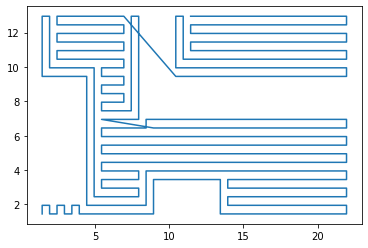

In [9]:
plt.plot(xx, yy)